# Matplotlib

- Underpins many plotting libraries (Seaborn, pandas .plot)
- Two APIs: Stateful (plt.plot(...)) and object-oriented ( OO ) 
( fig, ax = plt.subplots(); ax.plot(...) ). 
- We'll prefer OO for clirity and scalability.
- Figures (the canvas) vs Axes (Individual plot area).


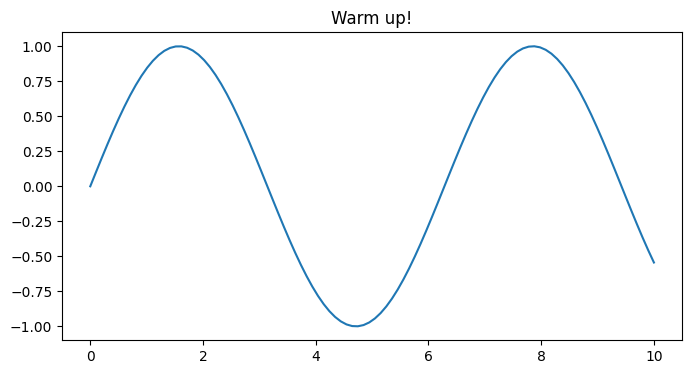

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Nice, readable default size for demos
plt.rcParams["figure.figsize"] = (8, 4)

# Quick sanity plot
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x))
plt.title("Warm up!")
plt.show()

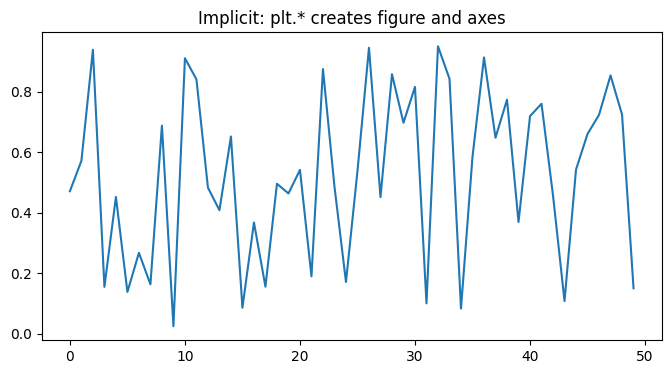

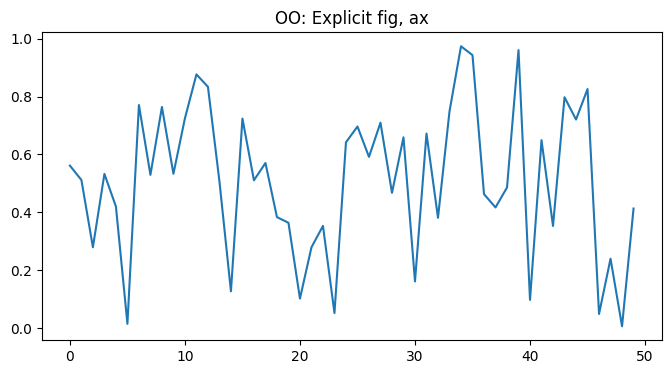

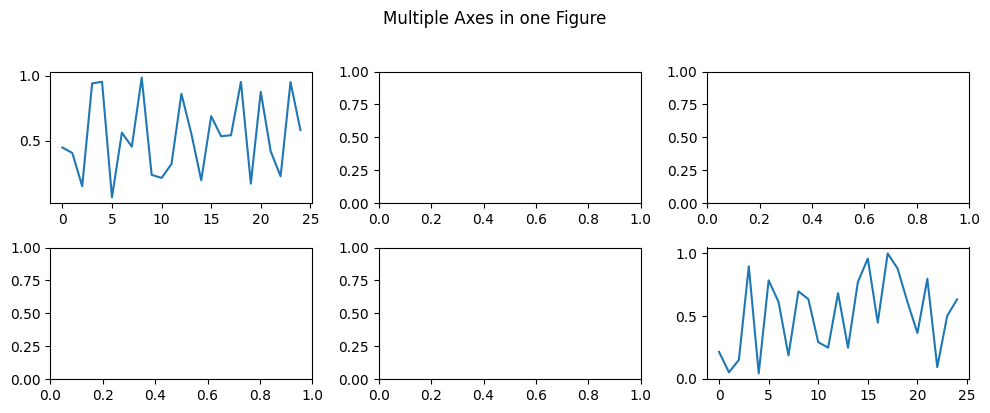

In [11]:
# Stateful - implicit figure/axes
plt.plot(np.random.rand(50))
plt.title("Implicit: plt.* creates figure and axes")
plt.show()

# Object Oriented (OO) explicit figure/axes
fig, ax = plt.subplots()
ax.plot(np.random.rand(50))
ax.set_title("OO: Explicit fig, ax")
plt.show()

# Grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 4))
axes[0, 0].plot(np.random.rand(25))
axes[1, 2].plot(np.random.rand(25))
fig.suptitle("Multiple Axes in one Figure", y=1.02)
plt.tight_layout()
plt.show()


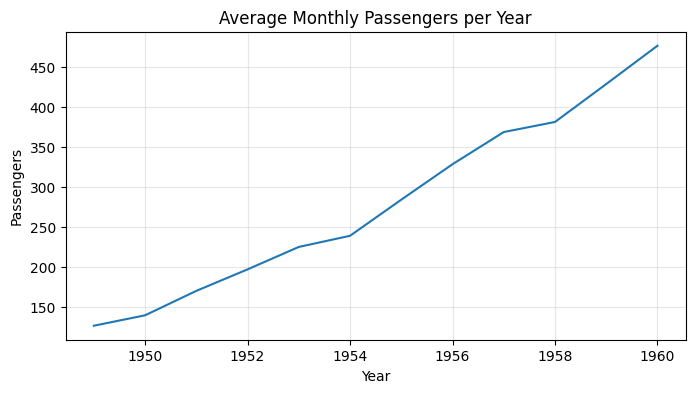

In [13]:
# Core plots with Seaborn datasets

## Line plot

flights = sns.load_dataset("flights") # columns: year, month, passengers

# Pivot to make a time-like index (year-month)
df_f = flights.pivot(index="year", columns="month", values="passengers")

fig, ax = plt.subplots()
ax.plot(df_f.index, df_f.mean(axis=1))
ax.set_title("Average Monthly Passengers per Year")
ax.set_xlabel("Year")
ax.set_ylabel("Passengers")
ax.grid(True, alpha=0.3)
plt.show()

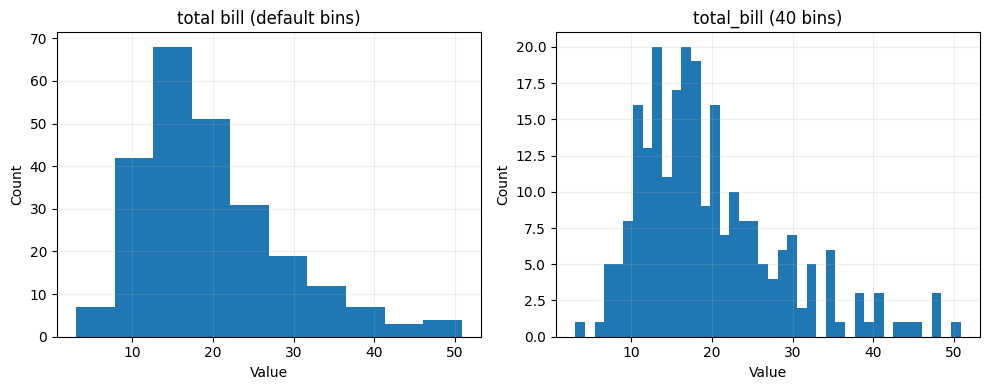

In [17]:
tips = sns.load_dataset("tips").dropna(subset=["total_bill", "tip"])

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].hist(tips["total_bill"])
axes[0].set_title("total bill (default bins)")

axes[1].hist(tips["total_bill"], bins=40)
axes[1].set_title("total_bill (40 bins)")

for ax in axes:
    ax.set_xlabel("Value"); ax.set_ylabel("Count"); ax.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

/var/folders/hd/wvpfmg893d9ff7g872_k6hvh0000gn/T/ipykernel_41470/43625875.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data_by_species, labels=species)


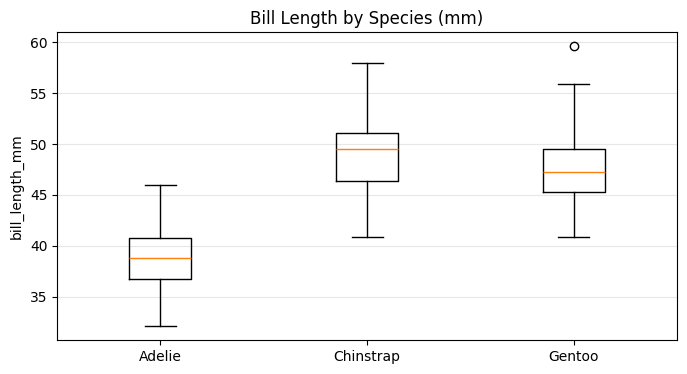

In [18]:
penguins = sns.load_dataset("penguins").dropna(subset=["species", "bill_length_mm"])

# Prepare a list of series for wach category (Matplotlib boxplot uses lists/arrays)
species = penguins["species"].unique()
data_by_species = [penguins.loc[penguins["species"] == s, "bill_length_mm"] for s in species]

fig, ax = plt.subplots()
ax.boxplot(data_by_species, labels=species)
ax.set_title("Bill Length by Species (mm)")
ax.set_ylabel("bill_length_mm")
ax.grid(axis="y", alpha=0.3)
plt.show()

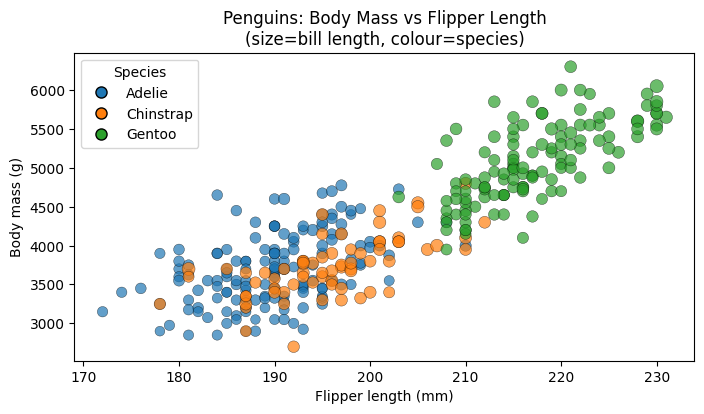

In [19]:
penguins = penguins.dropna(
    subset=["flipper_length_mm", "body_mass_g", "bill_length_mm", "species"]
)

# Map species -> colour manually (Matplotlib expects numeric or explicit colors for 'c')
palette = {"Adelie": "tab:blue", "Chinstrap": "tab:orange", "Gentoo": "tab:green"}
colours = penguins["species"].map(palette)

fig, ax = plt.subplots()
sc = ax.scatter(
    penguins["flipper_length_mm"],
    penguins["body_mass_g"],
    s=penguins["bill_length_mm"] * 1.5, # size encodes bill length
    c=colours,
    alpha=0.7,
    edgecolor="k",
    linewidth=0.3,
)
ax.set_xlabel("Flipper length (mm)")
ax.set_ylabel("Body mass (g)")
ax.set_title("Penguins: Body Mass vs Flipper Length\n(size=bill length, colour=species)")

# Manual legend for species
handles = [plt.Line2D(
    [0],
    [0],
    marker='o',
    color='w',
    markerfacecolor=palette[s],
    markeredgecolor='k',
    markersize=8,
    label=s
) for s in palette]

ax.legend(handles=handles, title="Species", frameon=True)
plt.show()


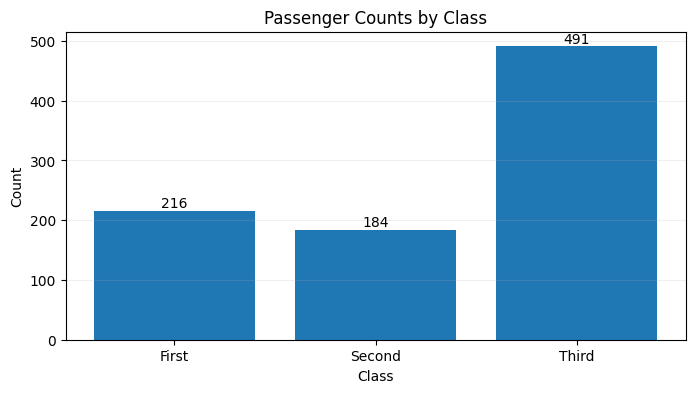

In [21]:
## Bar & Pie

titanic = sns.load_dataset("titanic").dropna(subset=["class"])
counts = titanic["class"].value_counts().sort_index() # first, second, third

fig, ax = plt.subplots()
ax.bar(counts.index, counts.values)
ax.set_title("Passenger Counts by Class")
ax.set_xlabel("Class")
ax.set_ylabel("Count")
for i, v in enumerate(counts.values):
    ax.text(i, v, str(v), ha="center", va="bottom")
ax.grid(axis="y", alpha=0.2)
plt.show()

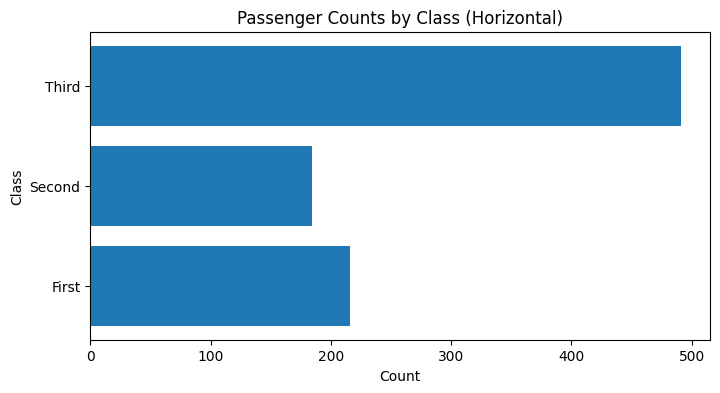

In [22]:
# horizontal variant

fig, ax = plt.subplots()
ax.barh(counts.index, counts.values)
ax.set_title("Passenger Counts by Class (Horizontal)")
ax.set_xlabel("Count")
ax.set_ylabel("Class")
plt.show()


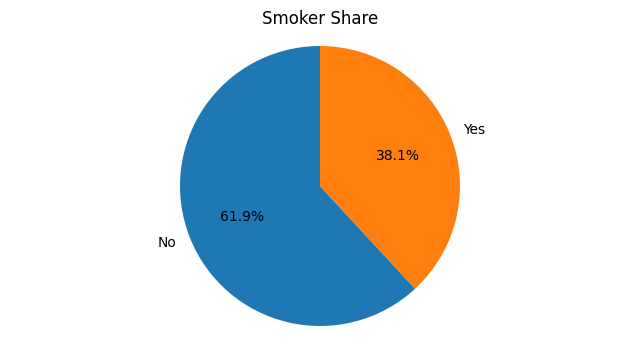

In [23]:
# Pie
tips = sns.load_dataset("tips").dropna(subset=["smoker"])
p = tips["smoker"].value_counts(normalize=True) # proportions

fig, ax = plt.subplots()
ax.pie(p.values, labels=p.index, autopct="%1.1f%%", startangle=90)
ax.set_title("Smoker Share")
ax.axis("equal") # make circle round
plt.show()